In [42]:
import pandas as pd
import numpy as np

### Reading Data

In [4]:
!pip install openpyxl

In [22]:
df = pd.read_excel('../data/Prices.xlsx', sheet_name='Daily_Indexed', skiprows=8, usecols='D:E', index_col='Name', parse_dates=True)

In [3]:
df.head()

,US dollar
Name,
1978-12-29,78.53
1979-01-01,78.53
1979-01-02,78.80
1979-01-03,75.96
1979-01-04,77.54


In [7]:
df.index # already a datetime index

DatetimeIndex(['1978-12-29', '1979-01-01', '1979-01-02', '1979-01-03',
               '1979-01-04', '1979-01-05', '1979-01-08', '1979-01-09',
               '1979-01-10', '1979-01-11',
               ...
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15'],
              dtype='datetime64[ns]', name='Name', length=11296, freq=None)

### Visualization and Analytics

            US dollar
Name                 
1978-12-31  78.530000
1979-01-31  78.949130
1979-02-28  85.361500
1979-03-31  84.102727
1979-04-30  82.927619


<AxesSubplot:xlabel='Name'>

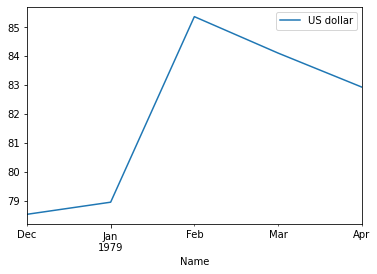

In [10]:
# Mean value at the end of month
print(df.resample(rule='M').mean().head())
df.resample(rule='M').mean().head().plot() # 1978 Dec - 1979 April

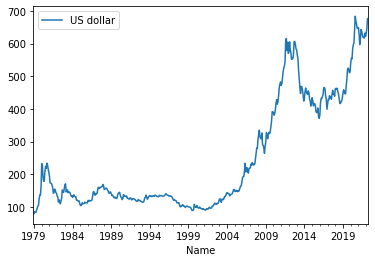

In [12]:
df.resample(rule='M').mean().plot(); # 1978 Dec-Curr

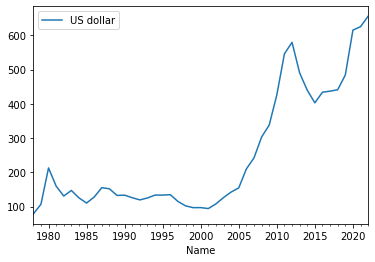

In [14]:
df.resample(rule='AS').mean().plot(); # year start resample, less noise

In [20]:
df.rolling(window=30).mean()[30:] # rolling average of every month

,US dollar
Name,
1979-02-09,80.172000
1979-02-12,80.383333
1979-02-13,80.543333
1979-02-14,80.798667
1979-02-15,81.083333
...,...
2022-04-11,675.925000
2022-04-12,676.375000
2022-04-13,676.934000


<AxesSubplot:xlabel='Name'>

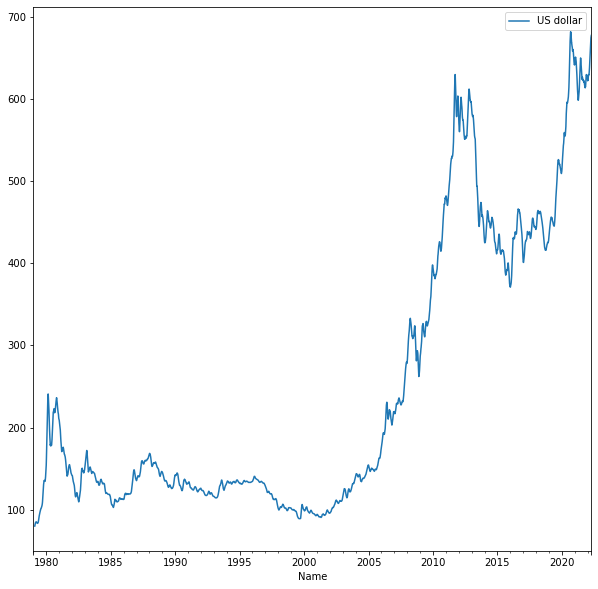

In [23]:
df.rolling(window=30).mean().plot(figsize=(10,10)) # rolling average of every month

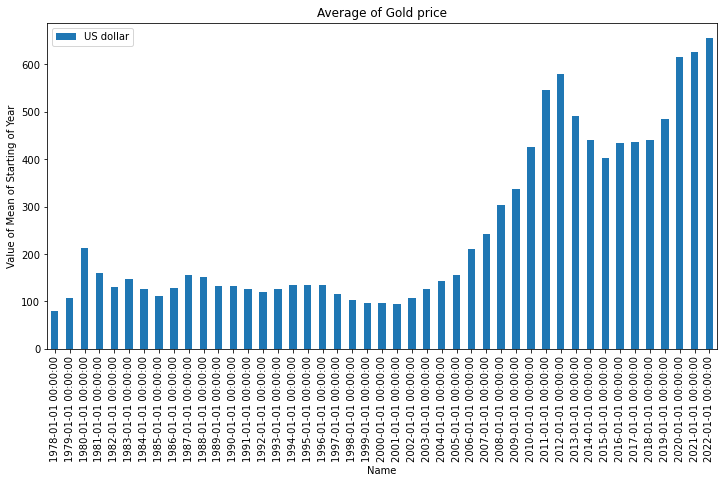

In [26]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Gold price', ylabel='Value of Mean of Starting of Year');

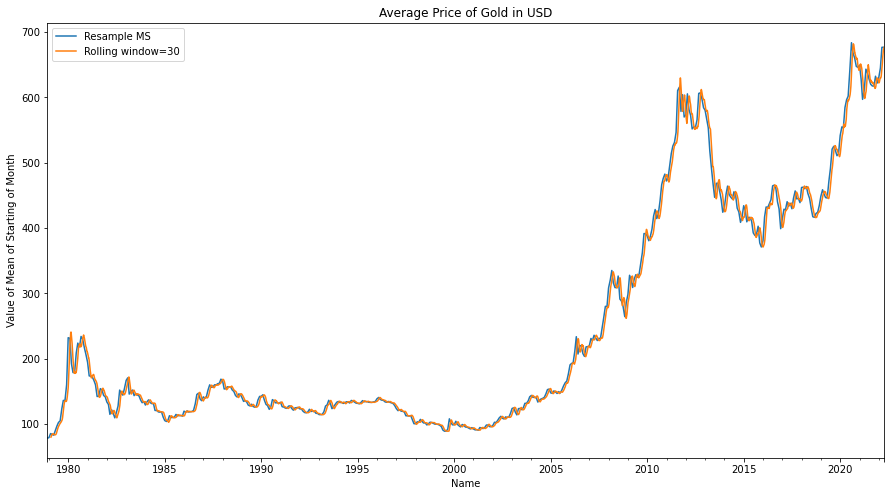

In [33]:
ax = df['US dollar'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['US dollar'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')
ax.legend()

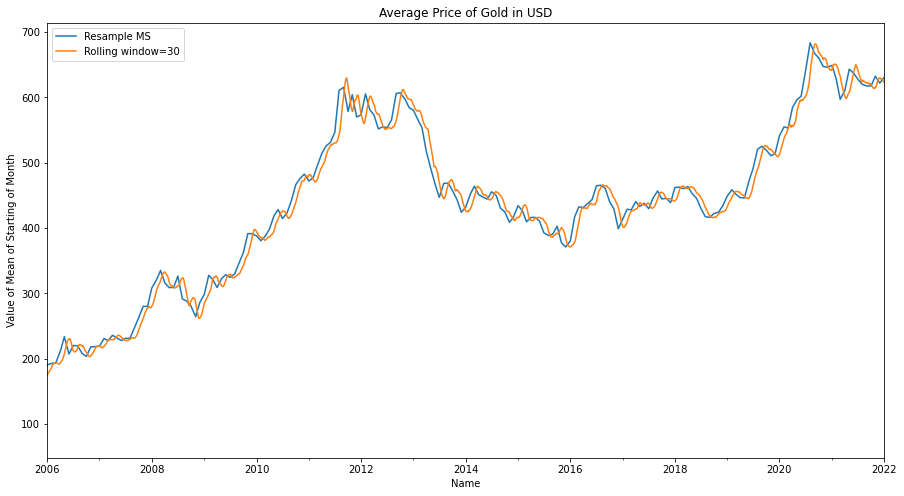

In [41]:
# rolling mean from 2006, till 2020 to check the spike and decrease.

ax = df['US dollar'].resample(rule='M').mean().plot(xlim=['2006-01-01','2022-01-01'], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['US dollar'].plot(xlim=['2006-01-01','2022-01-01'],label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average Price of Gold in USD')
ax.legend()

## Models
* ARIMA
* FBProphet
* Bi-directional LSTM
* Pycaret

In [4]:
# !pip install fbprophet

In [6]:
from fbprophet import Prophet

In [7]:
model1=Prophet(interval_width=0.95)

In [31]:
# renaming for fbprophet
df.rename_axis('ds', inplace=True)
df.rename(columns={'US dollar':'y'}, inplace=True)
df.reset_index(inplace=True) 

df.head()

,ds,y
0,1978-12-29,78.53
1,1979-01-01,78.53
2,1979-01-02,78.80
3,1979-01-03,75.96
4,1979-01-04,77.54


In [32]:
model1.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### predictions

In [33]:
future_dataset= model1.make_future_dataframe(periods=5, freq='y')

In [35]:
future_dataset.tail()

,ds
11296,2022-12-31
11297,2023-12-31
11298,2024-12-31
11299,2025-12-31
11300,2026-12-31


In [37]:
pred = model1.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1978-12-29,63.058881,7.102939,119.839270
1,1979-01-01,64.677406,5.291470,122.325602
2,1979-01-02,65.257916,9.416698,124.448178
3,1979-01-03,65.903311,12.111021,119.886817
4,1979-01-04,66.503734,12.795523,123.787474


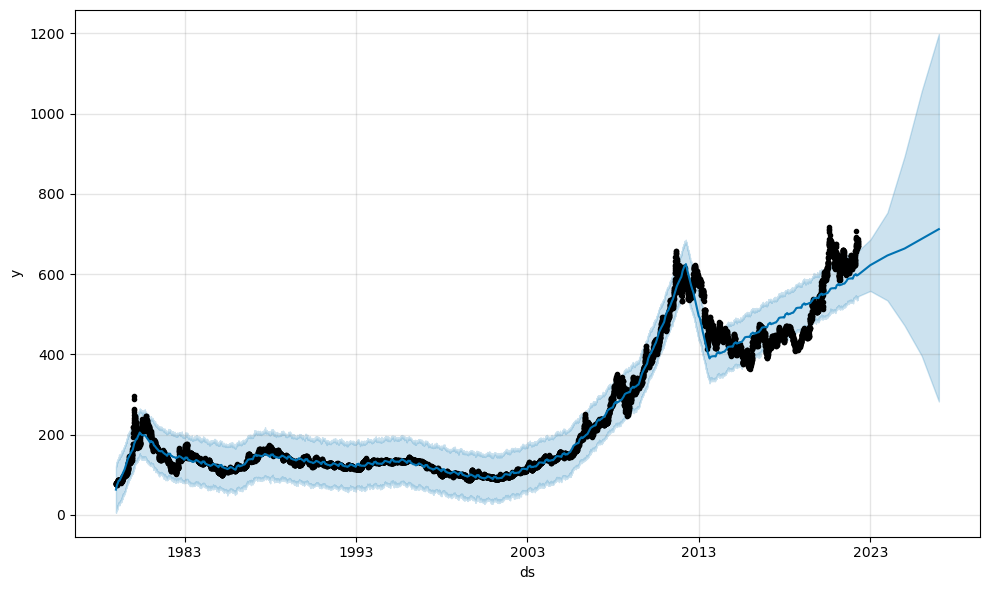

In [38]:
model1.plot(pred)

In [59]:
future_dataset.loc[[0,1]]

,ds
0,1978-12-29
1,1979-01-01


In [85]:
date_pred='2030-12-12'

In [86]:
date = pd.DataFrame({'ds':pd.date_range(start=date_pred, end=date_pred)})

date.head()

,ds
0,2030-12-12


In [88]:
pred = model1.predict(date)

In [90]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2030-12-12,811.506666,-194.624462,1876.84602,-192.356113,1876.333107,-4.123361,-4.123361,-4.123361,-2.048931,-2.048931,-2.048931,-2.07443,-2.07443,-2.07443,0.0,0.0,0.0,807.383305


In [ ]:
T